In [11]:
import numpy as np
import clima_anom as ca

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Example to obtain season climatology and anomaly

In [12]:
data_dir = '../data/3B42_199901_201212.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
pre = data['prec']
tim = data['time']

lat : (110,)
lon : (110,)
time : (168,)
prec : (168, 110, 110)


In [13]:
pre_dictionary = ca.data_dictionary(pre)


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  14
Numbers of months:  168


In [14]:
summer_clim, summer_anom = ca.season(pre_dictionary,1)
autumn_clim, autumn_anom = ca.season(pre_dictionary,2)
winter_clim, winter_anom = ca.season(pre_dictionary,3)
spring_clim, spring_anom = ca.season(pre_dictionary,4)

SUMMER Climatology

Climatology:  (110, 110)
Anomaly:  (13, 110, 110)

AUTUMN climatology

Climatology:  (110, 110)
Anomaly:  (13, 110, 110)
WINTER Climatology

Climatology:  (110, 110)
Anomaly:  (13, 110, 110)
SPRING Climatology

Climatology:  (110, 110)
Anomaly:  (13, 110, 110)


In [15]:
lon2d, lat2d = np.meshgrid(lon, lat)

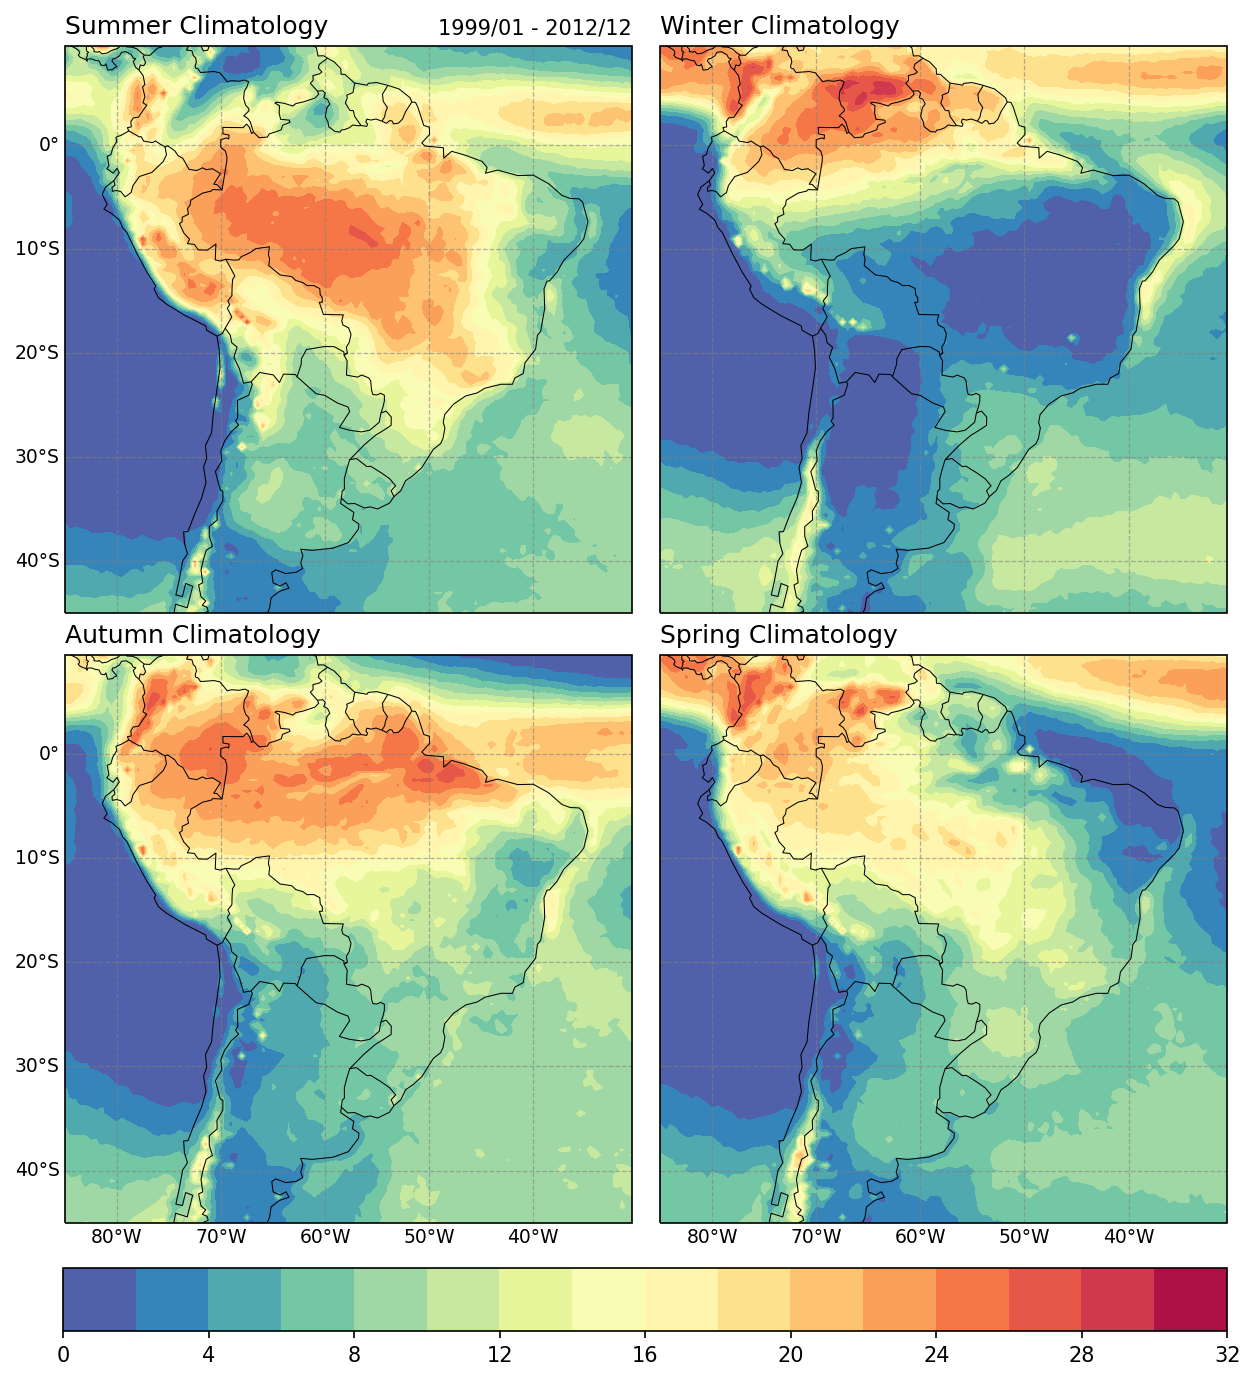

In [16]:
levels = np.arange(0,34,2)
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10.5),dpi=150)
gs = gridspec.GridSpec(2,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, summer_clim,levels=levels,cmap=cmap)
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Summer Climatology',fontsize=12,loc='left')
ax1.set_title('1999/01 - 2012/12',fontsize=10,loc='right')

ax2 = plt.subplot(gs[1, 0], projection = proj)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a2 = ax2.contourf(lon2d, lat2d, autumn_clim,levels=levels,cmap=cmap)
gl = ax2.gridlines(crs = proj,draw_labels=False,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax2.set_title('Autumn Climatology',fontsize=12,loc='left')

ax3 = plt.subplot(gs[0, 1], projection = proj) 
ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a3 = ax3.contourf(lon2d, lat2d, winter_clim,levels=levels,cmap=cmap)
gl = ax3.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax3.set_title('Winter Climatology',fontsize=12,loc='left')

ax4 = plt.subplot(gs[1, 1], projection = proj) 
ax4.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a4 = ax4.contourf(lon2d, lat2d, spring_clim,levels=levels,cmap=cmap)
gl = ax4.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax4.set_title('Spring Climatology',fontsize=12,loc='left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.06, 0.776, 0.04]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

# plt.savefig('../figures/Monthly_Seasonal.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)

In [17]:
tbar = ca.colorbar_middle_white(cmap, -1, 37)

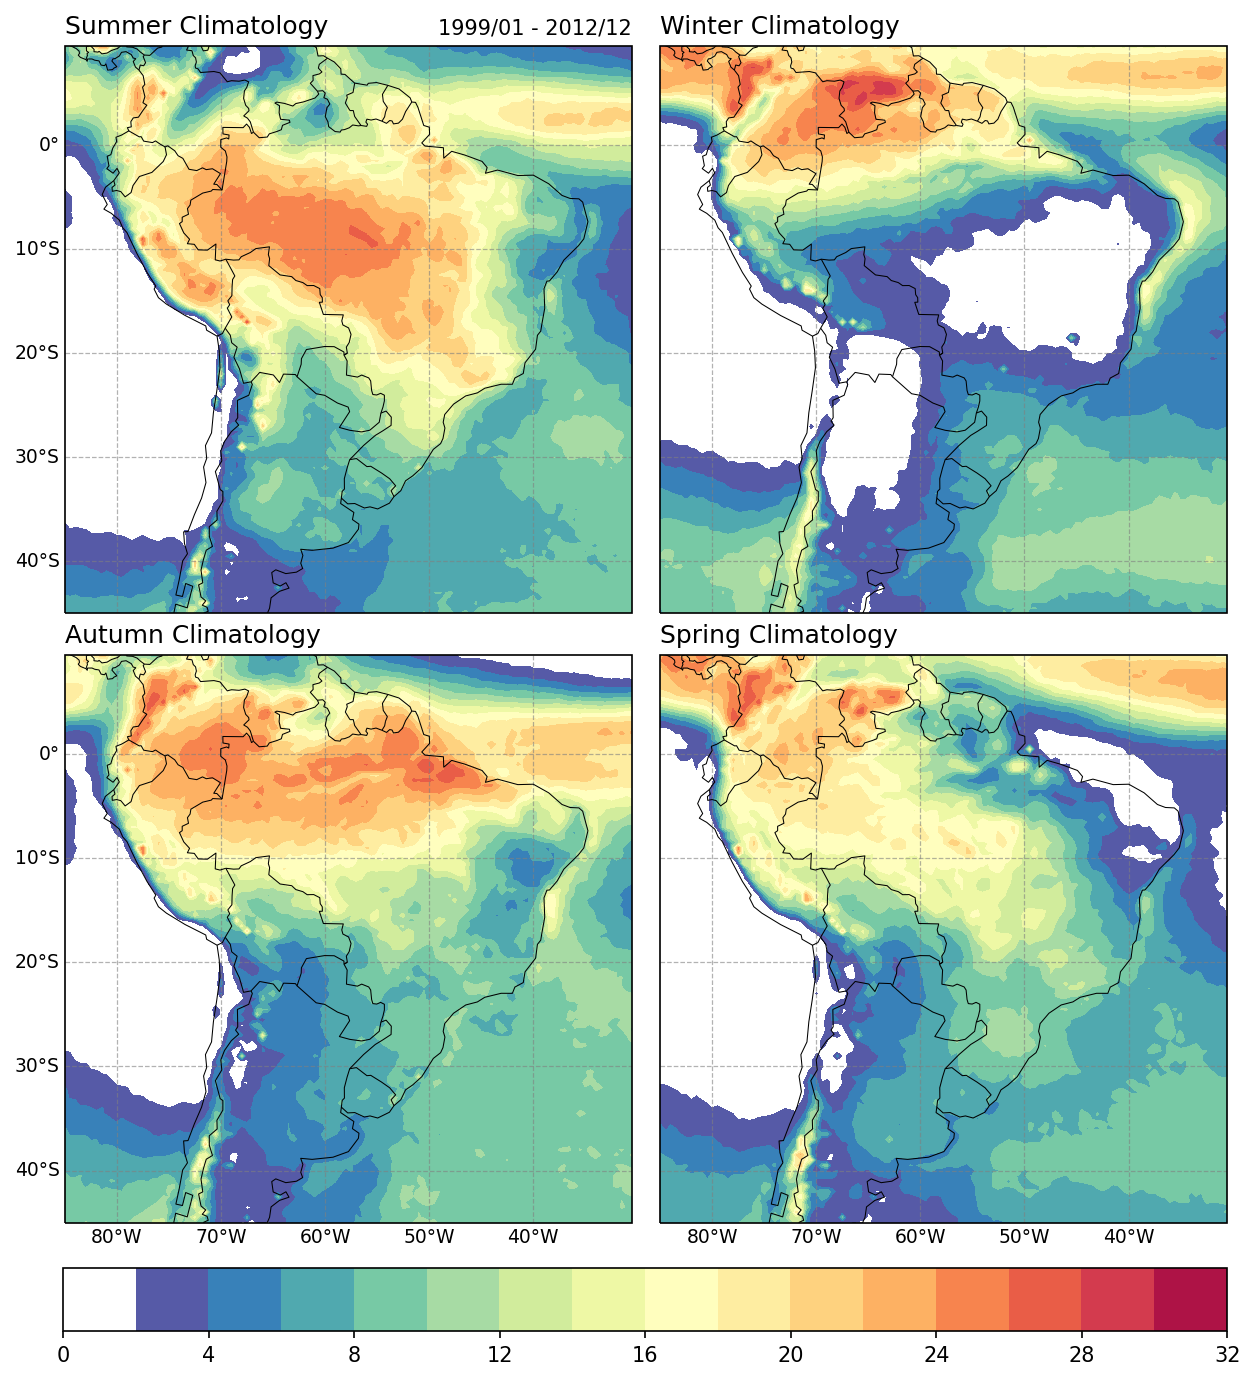

In [18]:
levels = np.arange(0,34,2)

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10.5),dpi=150)
gs = gridspec.GridSpec(2,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, summer_clim,levels=levels,cmap=tbar)
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Summer Climatology',fontsize=12,loc='left')
ax1.set_title('1999/01 - 2012/12',fontsize=10,loc='right')

ax2 = plt.subplot(gs[1, 0], projection = proj)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a2 = ax2.contourf(lon2d, lat2d, autumn_clim,levels=levels,cmap=tbar)
gl = ax2.gridlines(crs = proj,draw_labels=False,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax2.set_title('Autumn Climatology',fontsize=12,loc='left')

ax3 = plt.subplot(gs[0, 1], projection = proj) 
ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a3 = ax3.contourf(lon2d, lat2d, winter_clim,levels=levels,cmap=tbar)
gl = ax3.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax3.set_title('Winter Climatology',fontsize=12,loc='left')

ax4 = plt.subplot(gs[1, 1], projection = proj) 
ax4.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
a4 = ax4.contourf(lon2d, lat2d, spring_clim,levels=levels,cmap=tbar)
gl = ax4.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax4.set_title('Spring Climatology',fontsize=12,loc='left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.06, 0.776, 0.04]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

plt.savefig('../figures/Monthly_Seasonal.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)